# Comparative Study of Personal Loan Data and National Income Statistics

1. **Loaded the Credit Dataset**: Loaded the credit dataset (`credit_risk_dataset.csv`) into a pandas DataFrame.

2. **Initial Exploratory Data Analysis (EDA)**: Performed an initial EDA to understand the dataset structure, including the number of rows and columns, data types, and summary statistics. Also, checked the balance of the target variable (`loan_status`).

3. **Checked for Missing Data**: Found missing values in the `person_emp_length` and `loan_int_rate` columns.

4. **Loaded the US Household Income Dataset**: Unzipped and loaded the US household income dataset (`kaggle_income.csv`) into another pandas DataFrame.

5. **Compared Mean Incomes**: Calculated the mean income for both datasets and found that the average income in the credit dataset was slightly lower than the national average.

6. **Calculated Income Percentiles**: Calculated the 99th and 99.9th percentiles of income in the US household income dataset.

7. **Clipped Extreme Incomes**: Clipped values of `person_income` in the credit dataset that were higher than the 99.9th percentile of incomes in the US household income dataset.

8. **Calculated the Age of the Oldest Person**: Calculated the age of the oldest person alive, based on a birth date of January 2, 1903.

9. **Removed Unrealistic Ages**: Removed rows from the credit dataset where `person_age` was greater than the calculated age of the oldest person alive.

10. **Engineered New Features**: Proposed three new features to engineer:
    - Income to Loan Ratio (`income_loan_ratio`): The ratio of the person's income to the loan amount.
    - Income to Employment Length Ratio (`income_emp_length_ratio`): The ratio of the person's income to their employment length.
    - Loan Amount to Credit History Length Ratio (`loan_credit_hist_ratio`): The ratio of the loan amount to the length of the person's credit history.


In [4]:
from pathlib import Path

from scilint.scilint import get_project_root

project_root = get_project_root()
datasets_path = Path(project_root, "datasets")

In [5]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv(Path(datasets_path, "credit_risk_dataset.csv"))

# Display the first few rows of the DataFrame
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
# Check the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Summary of numerical features
print("\nSummary of numerical features:")
print(df.describe())

# Summary of categorical features
print("\nSummary of categorical features:")
print(df.describe(include=["O"]))

# Check the balance of the target variable `loan_status`
loan_status_counts = df["loan_status"].value_counts()
print("\nCounts of each class in the loan_status column:")
print(loan_status_counts)

The dataset has 32581 rows and 12 columns.

Missing values in each column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Summary of numerical features:
         person_age  person_income  person_emp_length     loan_amnt   
count  32581.000000   3.258100e+04       31686.000000  32581.000000  \
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04

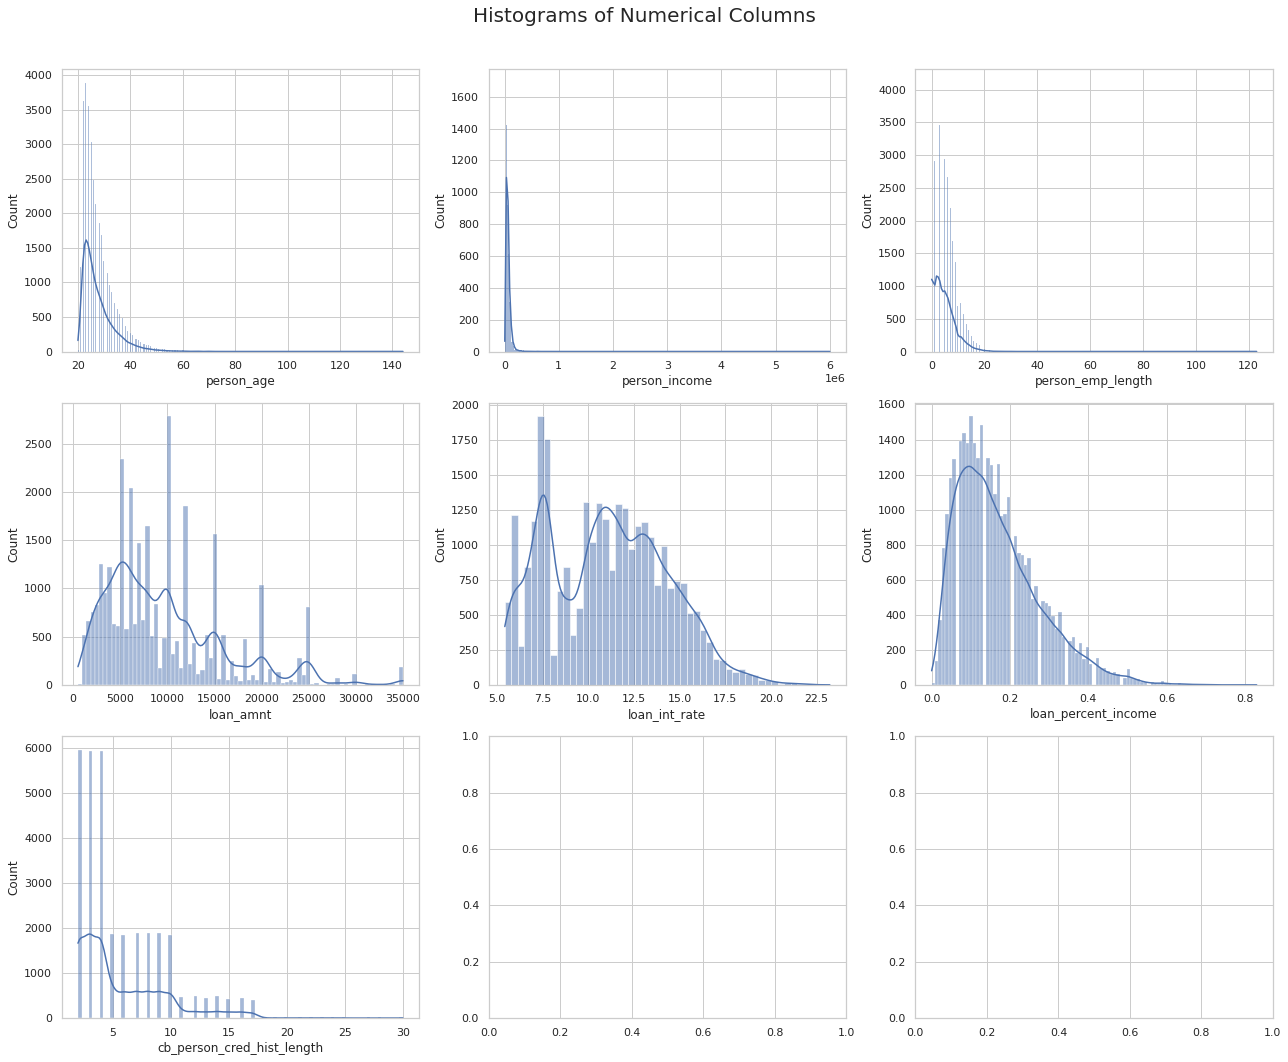

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set(style="whitegrid")

# Set up the figure and axes for a 3x3 grid of plots
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

# Plot histograms of the numerical columns
numerical_cols = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i // 3, i % 3])

# Add title and labels
fig.suptitle("Histograms of Numerical Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # For the suptitle space

plt.show()

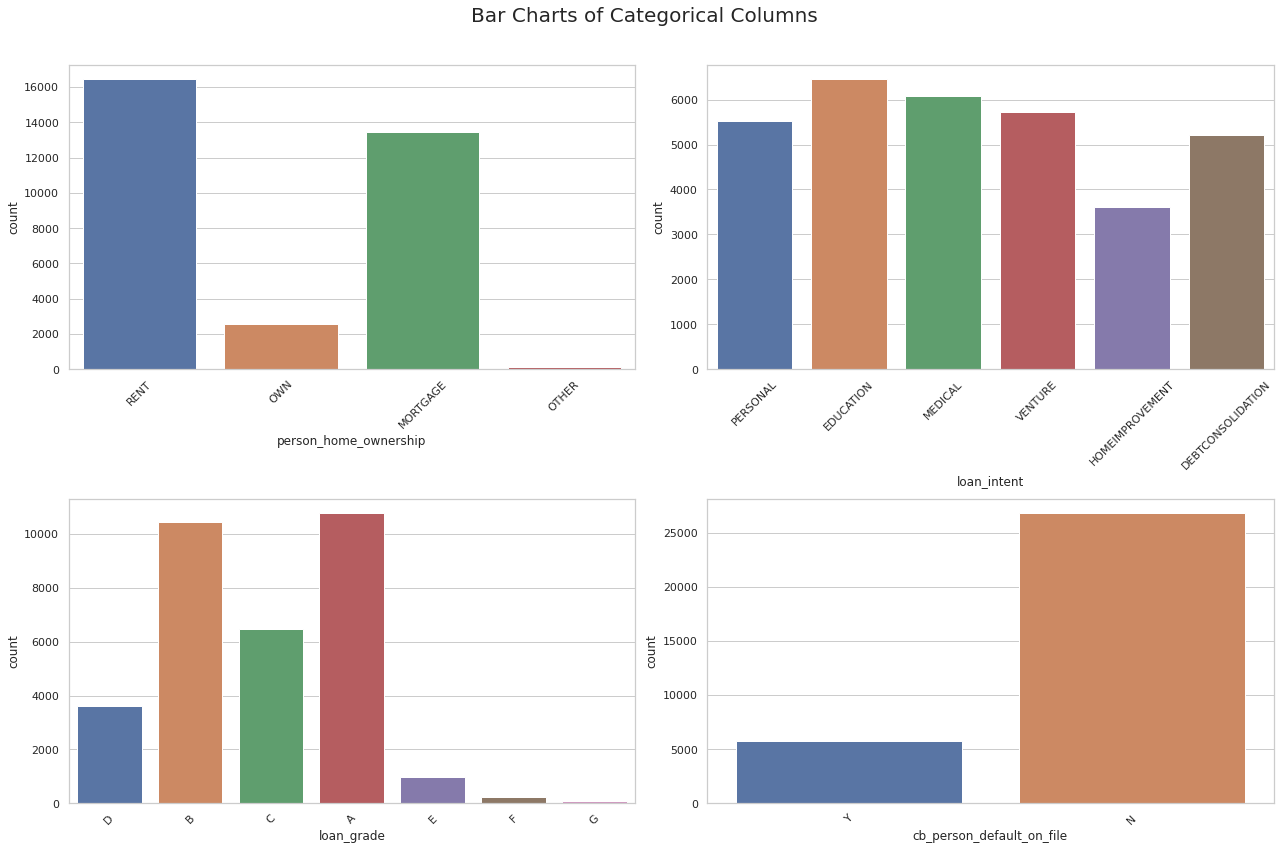

In [8]:
# Set up the figure and axes for a 2x2 grid of plots
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Plot bar charts of the categorical columns
categorical_cols = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file",
]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=ax[i // 2, i % 2])

# Rotate the x labels for better readability
for a in ax.flat:
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

# Add title and labels
fig.suptitle("Bar Charts of Categorical Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # For the suptitle space

plt.show()

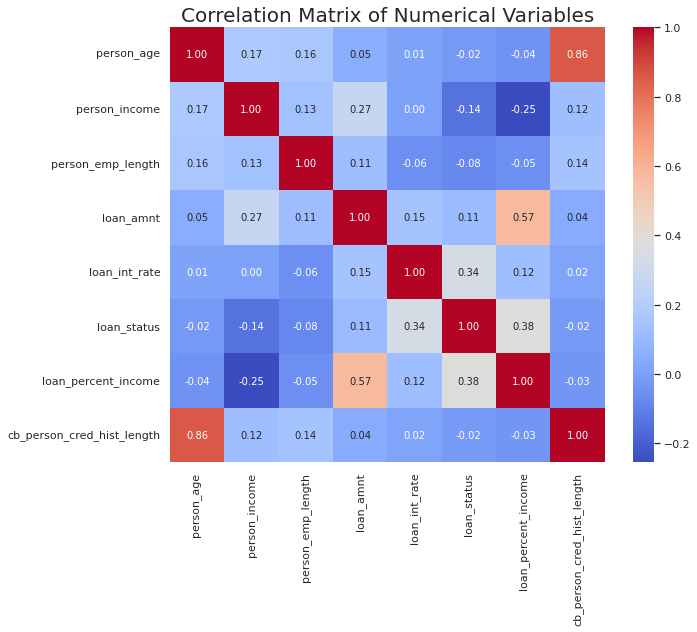

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title
plt.title("Correlation Matrix of Numerical Variables", fontsize=20)

plt.show()

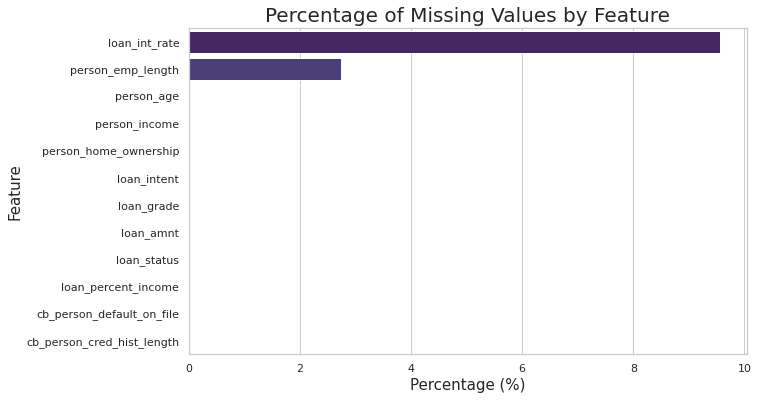

In [10]:
# Plot missing values
missing_values_ratio = df.isnull().mean() * 100
missing_values_ratio.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_values_ratio.values, y=missing_values_ratio.index, palette="viridis"
)
plt.title("Percentage of Missing Values by Feature", fontsize=20)
plt.xlabel("Percentage (%)", fontsize=15)
plt.ylabel("Feature", fontsize=15)
plt.show()

In [11]:
# Load the US income data into a DataFrame
df_income = pd.read_csv(
    Path(datasets_path, "household_income.csv"), encoding="ISO-8859-1"
)

# Display the first few rows of the DataFrame
df_income.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [12]:
# Calculate the mean income for the US income dataset
mean_income_us = df_income["Mean"].mean()

# Calculate the mean income for the credit dataset
mean_income_credit = df["person_income"].mean()

mean_income_us, mean_income_credit

(66703.98604193568, 66074.84846996715)

In [13]:
# Calculate the 99th percentile of income for the US income dataset
percentile_99_income_us = df_income["Mean"].quantile(0.99)

percentile_99_income_us

161044.25

In [14]:
# Calculate the 99.9th percentile of income for the US income dataset
percentile_999_income_us = df_income["Mean"].quantile(0.999)

percentile_999_income_us

190376.8000000002

In [15]:
# Calculate the maximum value of person_income in the credit dataset
max_person_income_credit = df["person_income"].max()

max_person_income_credit

6000000

In [16]:
# Clip values of person_income higher than the 99.9th percentile of US household income
df["person_income_clipped"] = df["person_income"].clip(upper=percentile_999_income_us)

# Check the new maximum value of person_income_clipped
max_person_income_clipped = df["person_income_clipped"].max()

max_person_income_clipped

190376.8000000002

In [17]:
from datetime import datetime

# Date of birth of the oldest person
dob = datetime(1903, 1, 2)

# Today's date
today = datetime(2023, 7, 19)

# Calculate the age
oldest_person_age = (
    today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
)

oldest_person_age

120

In [18]:
# Remove rows where person_age is greater than oldest_person_age
df = df[df["person_age"] <= oldest_person_age]

# Check the new maximum person_age
max_person_age = df["person_age"].max()

max_person_age

94

In [19]:
# Calculate the number of rows removed
num_rows_after_removal = df.shape[0]
num_rows_removed = num_rows - num_rows_after_removal

num_rows_removed

5

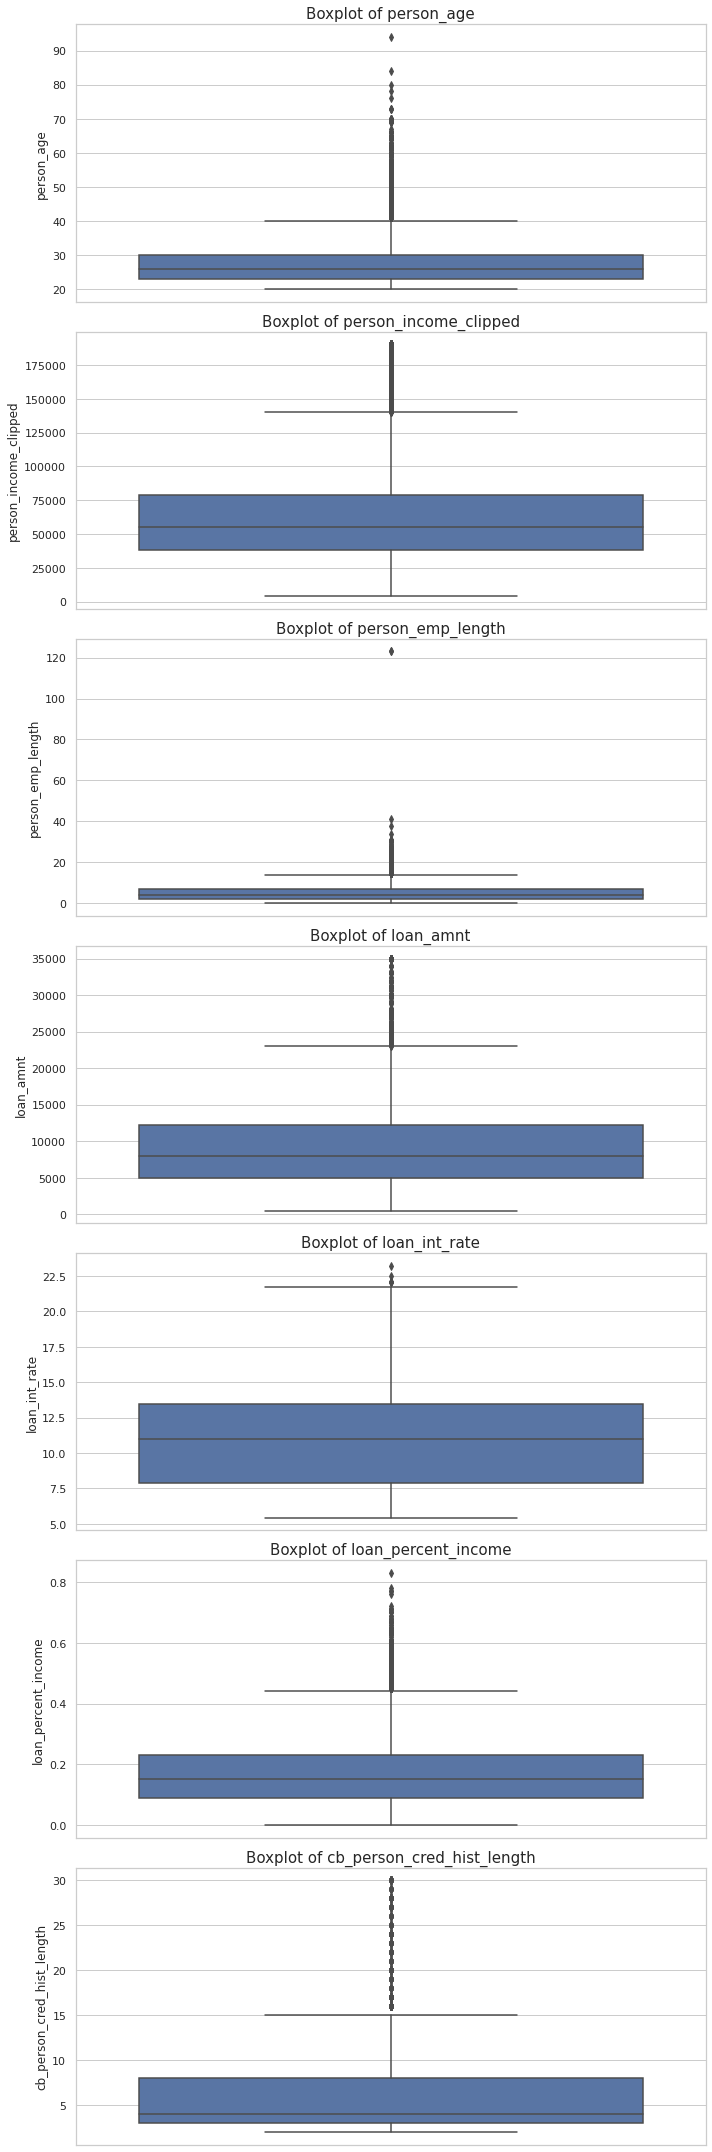

In [20]:
# List of numerical columns
numerical_cols = [
    "person_age",
    "person_income_clipped",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

# Create boxplots for each numerical column
fig, ax = plt.subplots(len(numerical_cols), 1, figsize=(10, 30))

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}", fontsize=15)

plt.tight_layout()
plt.show()

In [21]:
# Feature Engineering

# 1. Income to Loan Ratio
df["income_loan_ratio"] = df["person_income_clipped"] / df["loan_amnt"]

# 2. Income to Employment Length Ratio
# Before creating this feature, we need to handle missing values in 'person_emp_length'.
# Here, we fill the missing values with the median of the column.
df["person_emp_length"].fillna(df["person_emp_length"].median(), inplace=True)
df["income_emp_length_ratio"] = df["person_income_clipped"] / df["person_emp_length"]

# 3. Loan Amount to Credit History Length Ratio
df["loan_credit_hist_ratio"] = df["loan_amnt"] / df["cb_person_cred_hist_length"]

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,income_emp_length_ratio,loan_credit_hist_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,59000.0,1.685714,479.674797,11666.666667
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9600.0,9.600000,1920.000000,500.000000
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9600.0,1.745455,9600.000000,1833.333333
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,65500.0,1.871429,16375.000000,17500.000000
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,54400.0,1.554286,6800.000000,8750.000000


In [22]:
df.shape

(32576, 16)

In [23]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,income_emp_length_ratio,loan_credit_hist_ratio
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,59000.0,1.685714,479.674797,11666.666667
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,9600.0,9.600000,1920.000000,500.000000
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,9600.0,1.745455,9600.000000,1833.333333
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,65500.0,1.871429,16375.000000,17500.000000
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,54400.0,1.554286,6800.000000,8750.000000


In [24]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income_clipped,income_loan_ratio,income_emp_length_ratio,loan_credit_hist_ratio
count,32576.000000,3.257600e+04,32576.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000,32576.000000,32576.000000,3.257600e+04,32576.000000
mean,27.718044,6.588214e+04,4.767835,9589.117755,11.011547,0.218197,0.170212,5.803966,63856.023164,9.472046,inf,2396.077156
std,6.204990,5.253499e+04,4.087437,6321.886846,3.240623,0.413029,0.106778,4.053791,35989.203953,9.189024,NaN,2216.701462
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,4000.000000,1.204819,4.796748e+02,34.482759
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000,38500.000000,4.363636,8.000000e+03,866.666667
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000,55000.000000,6.740000,1.440000e+04,1678.750000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000,79200.000000,11.037592,3.333333e+04,3166.666667
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,190376.800000,190.376800,inf,17500.000000


In [25]:
df.to_csv(Path(datasets_path, "risk_data_preprocessed.csv"), index=False)